In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#weak classifier
class Decision_tree:
    def __init__(self):
        self.feat = None
        self.k = None
        self.alphas = None
        self.pol = 1

    def predict(self, X):
        num_samples = X.shape[0]
        X_col = X[:, self.feat]
        pre = np.ones(num_samples)
        if self.pol == 1:
            pre[X_col < self.k] = -1
        else:
            pre[X_col > self.k] = -1

        return pre


class train_AdaBoost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.classifiers = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classifiers = []
        
        ### BEGIN SOLUTION

        # Initialize weights
        w = np.full(num_samples, (1 / num_samples))
         
        # Pass through all 'k' classifiers
        for _ in range(self.n_clf):
            weak_clf = Decision_tree()
            min_err = float("inf")
            
            for i in range(num_features):
                X_col = X[:, i]
                thresholds = np.unique(X_col)

            # Fit a decision stump 
                for t in thresholds:
                    p = 1
                    predictions = np.ones(num_samples)
                    predictions[X_col < t] = -1

                    # Calculate the error rate
                    missed = w[y != predictions]
                    error = sum(missed)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_err:
                        weak_clf.pol = p
                        weak_clf.k = t
                        weak_clf.feat = i
                        min_err = error

            # calculate performance
            EPS = 1e-10
            weak_clf.alphas = 0.5 * np.log((1.0 - min_err + EPS) / (min_err + EPS))
            
            # calculate predictions and update weights
            predictions = weak_clf.predict(X)

            # Increase the weight of misclassified points
            w *= np.exp(-weak_clf.alphas * y * predictions)

            # Normalize the sum of weight to one
            w /= np.sum(w)

            # Append your classifier to the list classifiers
            self.classifiers.append(weak_clf)

    def predict(self, X):
        clf_preds = [c.alphas * c.predict(X) for c in self.classifiers]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)
        return y_pred
    
    def plot_AdaBoost(self, X, y):
    
        # Get limits of x and y for plotting the decision surface
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        # Get points at a distance of h between the above limits 
        h = 0.02    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        temp = np.c_[xx.ravel(), yy.ravel()]

        # Classify the all the points
        P = self.predict(temp).reshape(yy.shape)

        # Plot the decision boundary and margin
        plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
        plt.show()
  
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

Mounted at /content/drive


#Import Data

In [ ]:
#import data
X_train=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/X_train.csv",header=None)
y_train=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/y_train.csv",header=None)
    
X_test=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/X_test.csv",header=None)
y_test=pd.read_csv("/content/drive/MyDrive/PRML/IITM/Question2/y_test.csv",header=None)
 
y_train=y_train[0].values
y_test=y_test[0].values
    
X_train=X_train.values
X_test=X_test.values

# Plot Train Data

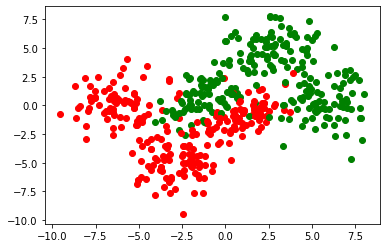

In [ ]:
X=X_train
y=y_train
for i in range(X.shape[0]):
    if(y[i]>0):
        plt.scatter(X[i][0],X[i][1],color='red')
    else:
         plt.scatter(X[i][0],X[i][1],color='green')
        
        
plt.savefig('Adaimage.png')

# For training with k=5

In [ ]:
Ada = train_AdaBoost(n_clf=5)
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
acc = accuracy(y_test, y_pred)
print("Accuracy on test data with (k=5):",round(acc,4))

Accuracy on test data with (k=5): 0.9


**To plot the learnt decision surface for k=5.**

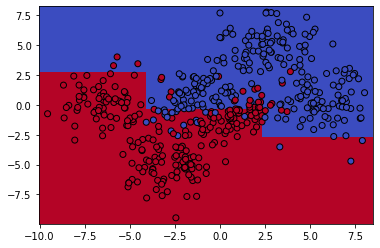

In [ ]:
Ada.plot_AdaBoost(X_train, y_train)

# For Training with k=100

In [ ]:
AdaB = train_AdaBoost(n_clf=100)
AdaB.fit(X_train, y_train)
y_pred = AdaB.predict(X_test)
acc = accuracy(y_test, y_pred)
print("Accuracy on test data for (k=100):",round(acc,4))  

Accuracy on test data for (k=100): 0.9167


**To plot the learnt decision surface for k=100.**


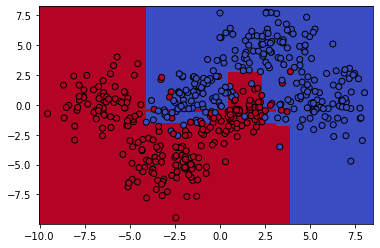

In [ ]:
AdaB.plot_AdaBoost(X_train, y_train)